In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv('E:/Class Notes/jillu mam/ML/Linear Regression Exam/3 Linear Regression using Python/Fish_dataset.csv')
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
68,Parkki,145.0,19.8,21.5,24.1,9.7364,3.1571
100,Perch,197.0,23.5,25.6,27.0,6.5610,4.2390
63,Parkki,90.0,16.3,17.7,19.8,7.4052,2.6730
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
89,Perch,135.0,20.0,22.0,23.5,5.8750,3.5250
107,Perch,300.0,26.9,28.7,30.1,7.5852,4.6354
34,Bream,950.0,38.0,41.0,46.5,17.6235,6.3705
55,Whitefish,270.0,23.6,26.0,28.7,8.3804,4.2476
46,Roach,140.0,21.0,22.5,25.0,6.5500,3.3250
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600


In [4]:
df.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
df.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### 1. Plot a bar chart showing count of individual species?

In [30]:
# Univariate analysis   
sp=df['Species'].value_counts()
sp=pd.DataFrame(sp)
sp.T #Print the transpose , so used T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


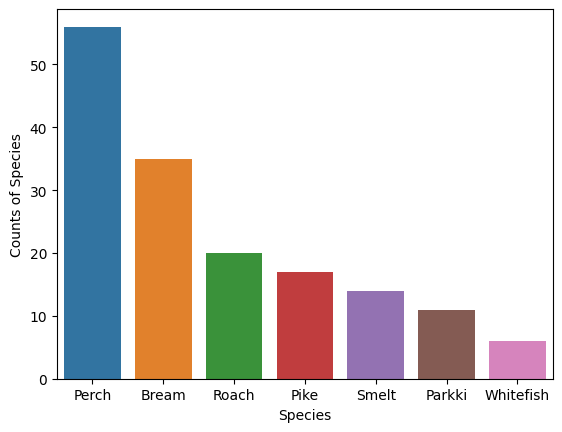

In [31]:
sns.barplot(x=sp.index,y=sp['Species'])
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

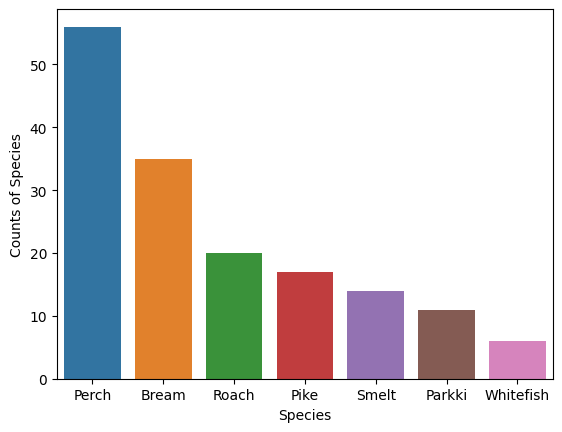

In [23]:
species = df['Species'].value_counts()
species = pd.DataFrame(species)
sns.barplot(x=species.index, y=species['Species'])
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

### 2. Identify outliers and remove if any?

<AxesSubplot: xlabel='Weight'>

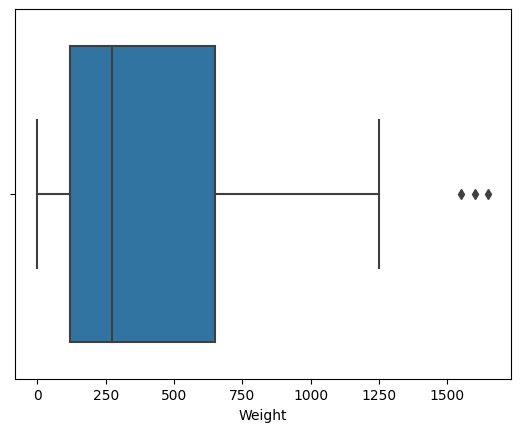

In [32]:
sns.boxplot(x=df['Weight'])

In [33]:
dflv=df['Weight']
dflv_Q1=dflv.quantile(0.25)
dflv_Q3=dflv.quantile(0.75)
dflv_IQR=dflv_Q3-dflv_Q1
dflv_lowerend=dflv_Q1-(1.5*dflv_IQR)
dflv_upperend=dflv_Q3+(1.5*dflv_IQR)

dflv_outlier=dflv[(dflv<dflv_lowerend)|(dflv>dflv_upperend)]
dflv_outlier

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

<AxesSubplot: xlabel='LengthVer'>

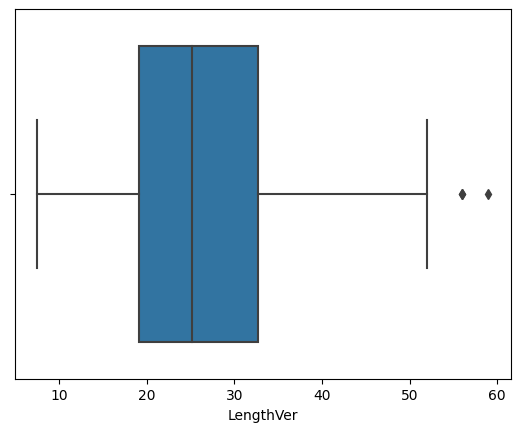

In [45]:

sns.boxplot(x=df['LengthVer'])

In [46]:
dflv = df['LengthVer']
dflv_Q1 = dflv.quantile(0.25)
dflv_Q3 = dflv.quantile(0.75)
dflv_IQR = dflv_Q3 - dflv_Q1
dflv_lowerend = dflv_Q1 - (1.5 * dflv_IQR)
dflv_upperend = dflv_Q3 + (1.5 * dflv_IQR)

dflv_outliers = dflv[(dflv < dflv_lowerend) | (dflv > dflv_upperend)]
dflv_outliers

142    56.0
143    56.0
144    59.0
Name: LengthVer, dtype: float64

<AxesSubplot: xlabel='LengthDia'>

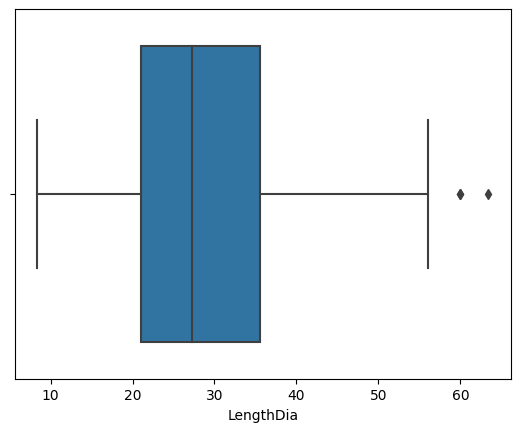

In [47]:
sns.boxplot(x=df['LengthDia'])

In [48]:
dfdia = df['LengthDia']
dfdia_Q1 = dfdia.quantile(0.25)
dfdia_Q3 = dfdia.quantile(0.75)
dfdia_IQR = dfdia_Q3 - dfdia_Q1
dfdia_lowerend = dfdia_Q1 - (1.5 * dfdia_IQR)
dfdia_upperend = dfdia_Q3 + (1.5 * dfdia_IQR)

dfdia_outliers = dfdia[(dfdia < dfdia_lowerend) | (dfdia > dfdia_upperend)]
dfdia_outliers

142    60.0
143    60.0
144    63.4
Name: LengthDia, dtype: float64

<AxesSubplot: xlabel='LengthCro'>

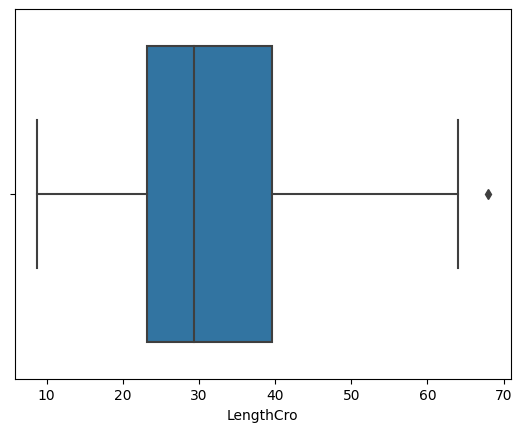

In [49]:
sns.boxplot(x=df['LengthCro'])

In [50]:
dfcro = df['LengthCro']
dfcro_Q1 = dfcro.quantile(0.25)
dfcro_Q3 = dfcro.quantile(0.75)
dfcro_IQR = dfcro_Q3 - dfcro_Q1
dfcro_lowerend = dfcro_Q1 - (1.5 * dfcro_IQR)
dfcro_upperend = dfcro_Q3 + (1.5 * dfcro_IQR)

dfcro_outliers = dfcro[(dfcro < dfcro_lowerend) | (dfcro > dfcro_upperend)]
dfcro_outliers

144    68.0
Name: LengthCro, dtype: float64

In [51]:
df1 = df.drop([142,143,144])
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
LengthVer,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
LengthDia,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
LengthCro,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


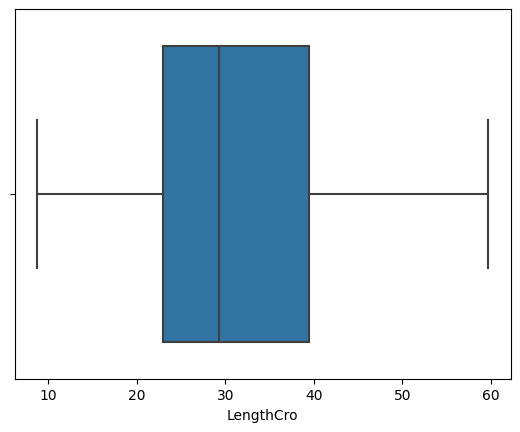

In [54]:
sns.boxplot(x=df1['LengthCro']);

### 3. Build a regression model and print regression equation?

In [55]:
# Dependant (Target) Variable:
y = df1['Weight']
# Independant Variables:
X = df1.iloc[:,2:7]

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [57]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (124, 5)
y_train:  (124,)
X_test:  (32, 5)
y_test:  (32,)


In [58]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [59]:
# My model's parameters:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -441.00887253881797
Model coefficients:  [ 89.93843031 -32.68619524 -37.53063323  33.07275974  60.72005923]


In [60]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + '*X2 ' +
      str('%.2f' % reg.coef_[2]) + '*X3 + ' + str('%.2f' % reg.coef_[3]) + '*X4 + ' + str('%.2f' % reg.coef_[4]) + '*X5')

y = -441.01 + 89.94*X1 -32.69*X2 -37.53*X3 + 33.07*X4 + 60.72*X5


### 4. What is the mean score of the model at  95% confidence interval?

In [61]:
y_pred = reg.predict(X_test)


In [62]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(reg, X_train, y_train, cv=5, scoring='r2')
print(cross_val_score_train)

[0.89119112 0.93859621 0.92572295 0.88550794 0.83504798]


In [63]:
cross_val_score_train.mean()

0.8952132388952405

### 5. Compare real and predicted weights and give a conclusion statement based on it?

In [66]:
y_pred1 = pd.DataFrame(y_pred, columns=['Estimated Weight'])
y_pred1.head()


,Estimated Weight
0,746.034615
1,44.698577
2,282.287266
3,777.208209
4,-74.802289


In [67]:
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True) 
y_test1.head()

,Weight
0,650.0
1,51.5
2,180.0
3,955.0
4,40.0


In [68]:
ynew = pd.concat([y_test1, y_pred1], axis=1)
ynew

,Weight,Estimated Weight
0,650.0,746.034615
1,51.5,44.698577
2,180.0,282.287266
3,955.0,777.208209
4,40.0,-74.802289
5,0.0,159.717948
6,600.0,569.637735
7,514.0,651.097615
8,272.0,349.707917
9,9.8,-163.684074
